<a href="https://colab.research.google.com/github/VandersonLopes/PUC-RIO2/blob/main/Pobreza_no_Brasil_Aluno_Vanderson_Lopes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Análise da Pobreza no Brasil**

Objetivo: Identificar (predizer) se determinado indivíduo está dentro ou fora da faixa de pobreza com base em características sócio-econômicas dos indivíduos. Portanto, estamos diante de um problema de Machine Learning de classificação.


Dataset utilizado: Poverty in Brazil, disponível no kaggle.com (https://www.kaggle.com/datasets/patrickgomes/determinants-of-poverty-in-brazil).

A base de dados contém 20.752 linhas (observações), que são os indivíduos.

Cada indivíduo tem para si 8 atributos sócio-econômicos, a saber: gênero ("woman"), idade ("age"), escolaridade ("education"), atividade econômica em que trabalha ("work"), área metropolitana ("metropolitan_area"), cor/raça ("non_white"), centro urbano ("urban") e autorização para trabalhar ("work_permit").

Esses atributos são dados categóricos podem receber os seguintes valores:

- "woman": 0 - homem; 1 - mulher;

- "age": valores inteiros;

- "education": 1 - analfabeto ou menos de 1 ano de estudo; 2 - fundamental incompleto; 3 - fundamental completo; 4 - médio incompleto; 5 - médio completo;
6 - superior incompleto; 7 - superior completo ou mais;

- "work": 1 - agricultura, pecuária ou extrativismo; 2 - indústria; 3 - construção civil; 4 - oficina mecânica; 5 - bens e serviços; 6 - hotelaria e alimentação; 7 - Informática, comunicação e finanças; 8 - administração pública; 9 - educação, saúde e serviço social; 10 - outros serviços; 11 - trabalho doméstico; 12 - atividades "mal definidas";

- "metropoliran_area": 0 - não vive em região metropolitana; 1 - vive em região metropilitana;

- "non_white": 0 - branco; 1 - não branco;

- "urban": 0 - vive em área rural; 1 - vive em centro urbano;

- "work_permit": 0 - não possui autorização para trabalhar; 1 - possui autorização para trabalhar; 2 - outros: servidor público, empregador.   


Já a variável *target* (y) é a classificação pela linha da pobreza ("poverty"). O indivíduo que tem uma renda média mensal acima de R$ 457 (valores de 2020) está fora da faixa de pobreza (e recebe o valor 0). Caso contrário, ele está dentro da faixa de pobreza (e recebe o valor 1).

Reiterando, portanto, este trabalho consiste em encontrar um bom preditor que, dados esses oito atributos acima descritos, consiga predizer se determinado indivíduo está dentro ou fora da faixa de pobreza.



## **1. Saudações Iniciais**



In [ ]:
# Saudações
print ("Olá, amigos, vamos iniciar a análise?")

Olá, amigos, vamos iniciar a análise?


## **2. Importação de bibliotecas para execução**

In [ ]:
# Configuração para não exibir os warnings. Para não poluir a seção de resultados das rotinas com comentários que não sejam indicativos de erros na construção do código.

import warnings
warnings.filterwarnings("ignore")

# Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split   # Para dividir a base de dados em base de treino e base de teste (holdout)
from sklearn.model_selection import StratifiedKFold   # Para preparar os folds da validação cruzada estratificada
from sklearn.model_selection import cross_val_score   # Para executar a Validação Cruzada
from sklearn.model_selection import GridSearchCV   # Para executar a Otimzação de hiperparâmetros dos modelos

# Métricas de Avaliação dos Algoritmos de Classificação

from sklearn.metrics import accuracy_score   # Acurácia
from sklearn.pipeline import Pipeline  # Importante para evitar DataLeakage

# Algoritmos de Classificação
from sklearn.linear_model import LogisticRegression   # Regressão Logística
from sklearn.tree import DecisionTreeClassifier   # Árvore de Decisão para Classificação
from sklearn.neighbors import KNeighborsClassifier   # KNN: Modelo dos "Vizinhos mais próximos"
from sklearn.naive_bayes import GaussianNB   # Naive Bayes
from sklearn.svm import SVC   # Support Vector Machine para Classificação

# Ensembles (Combinação de modelos)
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## **3. Carga / Importação da Base de Dados**

O banco de dados está armazenado em repositório público no Github.

In [ ]:
# URL de importação da base de dados a partir do repositório do Github

url = "https://raw.githubusercontent.com/VandersonLopes/PUC-RIO2/main/poverty_brazil.csv"

# Leitura do arquivo com a base de dados
dataset = pd.read_csv(url, delimiter=";")

# Exibe as primeiras linhas da base de dados
dataset.head()


,woman,age,education,work,metropolitan_area,non_white,urban,work_permit,poverty
0,0,59,5,8,1,1.0,1,2,0
1,0,21,5,8,1,0.0,1,0,0
2,0,59,2,9,1,1.0,1,1,0
3,1,58,5,8,1,1.0,1,2,0
4,1,56,2,9,1,1.0,1,1,0


Até aqui, foi feita apenas a importação, na íntegra, do banco de dados a partir do *Kaggle*. Ou seja, nada garante que esteja pronto para as operações matemáticas necessárias para resolver um problema de Machine Learning. Por isso, é necessária a etapa do Pré-processamento de dados.

## **4. Pré-processamento e Preparação do Banco de Dados**

Esta é uma etapa fundamental. Se ela não for realizada ou se for feita inadequadamente, pode inviabilizar a resolução do problema.

No nosso cotidiano, os dados são coletados e registrados de várias formas, fontes e pessoas diferentes. Tudo isso é um prato cheio para inconsistências e erros, que acabam por comprometer a qualidade do banco de dados. Portanto, é importante lançar mão de processos que garantam a qualidade dos dados.

Importante ressatar que, até este momento do MVP, a preocupação não é, ainda, buscar técnicas para aprimorar os resultados. Isso será visto mais adiante. O que se quer, por enquanto, é, tão simplesmente, garantir que as operações matemáticas ocorram e cheguem a algum resultado.

Nesse sentido, precisamos investigar, por exemplo, se há campos não preenchidos e, de for o caso, removê-los. Ou seja, vamos fazer a **limpeza de dados**, que é uma das técnicas de pré-processamento mais recomendadas. Para isso, vamos utilzar a função isna() conjugada com a função sum().

In [ ]:
# Investigando a existência de dados vazios (campos não preenchidos)

dataset.isna().sum()

woman                0
age                  0
education            0
work                 0
metropolitan_area    0
non_white            1
urban                0
work_permit          0
poverty              0
dtype: int64

Pelo resultado, vê-se que existe uma linha em que o atributo (coluna) "non_white" não está preenchida. Isso inviabiliza o problema. Como se trata de 1 linha de um total de 20.752, decide-se por eliminá-la com a crença de que terá pouco efeito na solução final. Para isso, utiliza-se a função dropna().

In [ ]:
# Excluindo a linha em que o campo não preenchido se encontra e atualiza o banco de dados
dataset = dataset.dropna()

# Verifica se a base de dados está "livre" da incosistência.
dataset.isna().sum()

woman                0
age                  0
education            0
work                 0
metropolitan_area    0
non_white            0
urban                0
work_permit          0
poverty              0
dtype: int64

Pronto! A base de dados está livre de inconsistências que impedem os cálculos.

Importante ressaltar que a base de dados original retirada do Kaggle, muito provavelmente, já havia passado por alguma etapa de pré-processamento. Isso porque todos os atributos já estavam com preenchimento numérico (valor). Por exemplo, na coluna "woman" já constava "0", se mulher; e "1", se homem.

Contudo, o mais comum é que estejam preenchidos com uma string categórica "mulher" ou "homem". Nesse caso em especial, duas aplicações que poderiam ser utilizadas para transformar uma informação categórica em uma informação numérica são label encoding e one-hot-enconding. Porém, o banco de dados importado já dispensou essas etapas de preparação dos dados.

De acordo com Kalinowski et al (2023), ao se construir um modelo de aprendizado supervisionado, estamos interessados na generalização. Isso significa que os modelos sejam bons não apenas para o conjunto de treinamento (o dataset usado para construir o modelo), mas para a população em geral. Aqui, a premissa é a de que o dataset é uma amostra finita de uma população.

Imadiatamente antes de separar a baseem treino e teste, retiramos um subconjunto do banco de dados (0,1% ou cerca de 20 observações) para no final desse trabalho, na etapa de validação. Esse subconjunto terá um papel muito importante, pois será utilizado para confrontar a predição do modelo com os dado observado. Chamaremos de conjunto de validação. No código, essa separação foi feita utilizando a função train_test_split(). Reiterando, esse conjunto de validação não compõe nem o conjunto de treino nem o conjunto de teste.

Em seguida, procede-se à separação, de forma aleatória, da base de dados remanescente em dois conjuntos mutuamente excludentes, não necessariamente de mesmo tamanho: base de treino (para estimação dos parâmetros) e base de teste (para validação). Essa operação é a técnica de amostragem chamada de **Holdout** ou de Validação Simples. O holdout "é importante porque, após construído, um modelo precisa ser validado com dados diferentes dos utilizados na sua construção" (KALINOWSKI, 2023, p. 250).

Nessa tarefa também utilizamos a função train_test_split(). Após a partição treino-teste, a estimação do modelo é realizada e, posteriormente, os dados de teste são aplicados e o erro de predição calculado.



In [ ]:
# Separação em Base de treino e Base de teste (Holdout ou Validação Simples)

X = dataset.drop(columns=["poverty"])
y = dataset["poverty"]

# Separa e retira uma parte de TODO o dataset (0,1%) para a validação final (X_val e y_val)
X, X_val, y, y_val = train_test_split(X, y, test_size=0.001, random_state=7)

# A base de teste é 20% de base de dados que permanece após a base de validação final ser retirada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # Holdout

Contudo, o método de Holdout pode apresentar problemas, pois é bastante suscetível à qualidade e, sobretudo, ao tamanho do dataset: a) observações muito importantes do dataset podem acabar sendo separadas para teste, prejudicando o treinamento do modelo e consequentemente piorando o resultado dos testes; b) Caso o dataset seja pequeno, dividir os dados entre treino e teste se torna inviável. Normalmente usamos datasets com centenas ou milhares de registros para treinar um modelo.

A base de dados importada para nosso problema possui, após a exclusão de uma linha com elemento não numérico e de 21 linhas (conjunto de validação), 20.730 informações, o que sugeriria um bom tamanho para aplicação do holdout. Subjetividades à parte, recomenda-se contorná-las e utilizar outro método: Método de Validação Cruzada (KFold).

Segundo Kalinowski et al (2023), a validação cruzada consiste em dividir aleatoriamente o conjunto de dados em k subconjuntos disjuntos com aproximadamente o mesmo número de elementos (n/k). A cada rodada, cada um dos k subconjuntos é usado com conjunto de teste e os restantes são reunidos em um único conjunto de treino. O processo é repetido k vezes, sendo então gerados e avaliados k modelos, e essas avaliações são geralmente consolidadas através da média.

Ainda segundo Kalinowski et al (2023), a validação cruzada garante uma melhor estimativa da acurácia de teste do modelo, pois em vez de ter a acurácia de este medida com apenas uma parte do dataset (como no holdout, que utiliza apenas o conjunto de teste), o modelo é testado, de alguma forma, com todos os dados do dataset, o que resulta em melhor aproveitamento do dataset.

A função cross_val_score() retorna uma lista com o resultado de cada um dos testes, utilizando a métrica padrão do modelo, que geralmente é a acurácia, para modelos de classificação.

O viés do método Kfold diminui quanto maior o valor de k. Sendo k = 10 o valor mais frequentemente usado, adotaremos, então, esse valor de k.

Aprofundando um pouco mais o trabalho, tem-se um banco de dados desbalanceado, ou seja, não se tem a mesma quantidade de observações entre as duas classes *target* (y): a quantidade de observações da classe que está dentro da linha da pobreza ("1') é cerca de 22,5% do total de observações (4.668 de 20.730). Neste caso, recomenda-se adotar uma variante da Validação Cruzada, que é a **Validação Cruzada Estratificada** (StratifiedKFold). Esse método garante que cada subconjunto K mantenha a mesma proporção interclasses observada no dataset total.

In [ ]:
# Parâmetros e partições da Validação Cruzada Estratificada ("Stratified Cross Validation") StratifiedKFold

num_particoes = 10 # Número de folds da validação cruzada estratificada
skf = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=7) # Validação Cruzada Estratificada

## **5. Modelagem**

Finalizada a etapa de pré-processamento e preparação do dataset, precisamos identificar o modelo que apresenta o melhor estimador (classificador) para o dataset em análise.

Conforme foi dito anteriormente, um bom algoritmo é aquele que captura bem as regularidades dos dados de treinamento (aprendendo bem com eles), mas que também generaliza bem para dados desconhecidos. De acordo com Kalinowski, isso é conhecido como o dilema bias x variância. É preciso evitar ou reduzir tanto o underfitting quanto o overfitting.

Quando o algoritmo não tem parametrizações adequadas e se ajustou pouco ao conjunto de treino a ponto de não realizar boas predições no conjunto de teste, ocorreu o underfitting. Por outro lado, ao se treinar um classificador, a hipótese identificada naquele aprendizado não pode ser muito específica a ponto de prejudicar uma boa generalização. O modelo não pode memorizar padrões padrões de treinamento. Quando isso ocorre, tem-se uma situação de overfitting. Ambos são indesejados. E uma das formas de lidar com esse dilema é, de novo, utilizar a validação cruzada.

Na busca pelo melhor modelo, a recomendação é experimentar, experimentar, experimentar...Não existe um melhor do que outro em todas as situações que se deseja analisar. Para isso, precisamoa utilizar métricas de avaliação adequadas. Neste trabalho, utilizaremos a métrica da **acurácia** (ou taxa de acerto). O modelo que fornecer a maior acurácia, será considerado o melhor preditor.

De partida, cinco algoritmos de classificação serão analisados: a) Regressão Logística; b) Árvore de Decisão de Classificação; c) KNN ("K-Nearest Neighbors" ou K-Vizinhos Mais Próximos); d) Naive Bayes; e) SVM ("Support Vector Machine" ou Máquina de Vetor de Suporte).

Logo em seguida, num segundo pacote, também foram treinados 6 meta-algoritmos, chamados ensembles. Os ensembles combinam várias técnicas de aprendizado de máquina em um modelo preditivo, com o objetivo de diminuir a variância, o viés ou melhorar as predições. Os ensembles vistos nesse trabalho foram os seguintes: f) Bagging; g) Random Forest; h) Extra Trees; i) AdaBoost; j) Gradient Boosting; k) Voting.

Ao final desse trecho, tem-se uma lista com os 11 resultados informando a média e o desvio padrão da acurácia (entre parêntesis), além do gráfico boxplot comparativo.

Com exceção da Regressão Logística, que teve o parâmetro padrão de número máximo de iterações ("max_iter") modificado para 2.000 iterações, todos os demais modelos não tiveram seus hiperparâmetros "default" alterados.

Neste estudo, o modelo ensemble "Voting" combina os algoritmos de Regressão Logística, Árvore de Decisão e SVM. Já o "Bagging" está combinando vários modelos de Árvore de Decisão (algoritmo base) a partir de diferentes subamostras dos dados de treinamento.

LR
LogisticRegression(max_iter=2000)
LR: 0.794560 (0.007659)
CART
DecisionTreeClassifier()
CART: 0.739868 (0.009647)
KNN
KNeighborsClassifier()
KNN: 0.780451 (0.006412)
NB
GaussianNB()
NB: 0.768090 (0.011279)
SVM
SVC()
SVM: 0.776713 (0.000227)
Bagging
BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
Bagging: 0.760370 (0.010958)
RF
RandomForestClassifier(max_features=3)
RF: 0.763325 (0.008673)
ET
ExtraTreesClassifier(max_features=3)
ET: 0.752411 (0.008231)
Ada
AdaBoostClassifier(n_estimators=100)
Ada: 0.807705 (0.007395)
GB
GradientBoostingClassifier()
GB: 0.808187 (0.009248)
Voting
VotingClassifier(estimators=[('logistic', LogisticRegression(max_iter=2000)),
                             ('cart', DecisionTreeClassifier()),
                             ('svm', SVC())])
Voting: 0.791666 (0.005018)


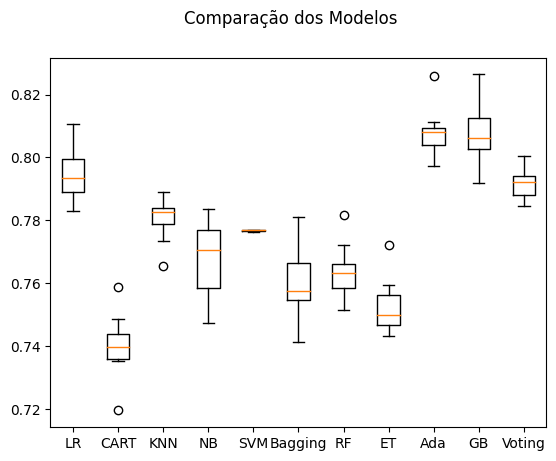

In [ ]:
# Definindo uma seed (semente) global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=2000)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador-base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=2000)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))


# Avaliação dos modelos
for name, model in models:
    print(name)
    print(model)
    cv_results = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Pelos resultados obtidos nessas primeiras rodadas, a acurácia média ficou ente 74% e 80,8%. Os ensembles Gradient Boosting e Ada Boosting, nessa ordem, apresentaram as melhores acurácias, ambos na faixa de 80,8%. Na outra ponta, o modelo de Árvore de Decisão foi o pior preditor. Como consequência, os ensembles Bagging, Extra Trees e Random Forest, que guardam relação com o modelo de Árvore de Decisão, também não foram bem. Por sua vez, o Voting apresentou uma acurácia melhor do que esses três últimos, possivelmente porque seu resultado combina o desempenho da Árvore de Decisão com outros dois modelos que foram bem (Regressão Logística e SVC).

Na sequência de investigação do melhor modelo a ser adotado, é salutar que sejam utilizados métodos avançados de análise além dos algoritmos ensembles. Esse processo de aprimoramento ocorre em três etapas: atuar no dataset (transformação dos dados), atuar no dataset (dimensionamento dos dados) e atuar na configuração dos modelos (otimização de hiperparâmetros).

É o que começaremos a ver em seguida.


## **6. Aprimoramento da Modelagem (Padronização e Normalização)**

A primeira etapa consiste na transformação do banco de dados e observar se os novos resultados são melhores ou piores do que o resultado anterior.

Duas técnicas de transformação do dataset são a **padronização** e a **normalização**.

A padronização redimensiona a distribuição dos atributos fazendo com que os valores observados passem a ter as propriedades de uma distribuição normal padrão (média igual a zero e desvio padrão igual a 1). Por sua vez, a normalização redimensiona os dados dos atributos do intervalo original para o intervalo de 0 a 1, alterando-os para uma escala comum sem distorcer as diferenças nos intervalos de valores.

No código de programação deste trabalho, a padronização é feita por StandardScaler() e a normalização é feita por MinMaxScaler().

Conforme recomenda Kalinowski et al (2023), vamos explorar os modelos com os dados sem transformação, com a padronização e com a normalização, e ver se os resultados são significativamente diferentes. Os resultados obtidos são apresentados em lista e a comparação entre os casos é visualizada em gráfico boxplot. O gráfico possui 33 resultados exibidos em 3 blocos de 11 modelos: sem transformação de dados (dataset original), com padronização (dataset padronizado); e com normalização (dataset normalizado).


LR-orig: 0.795 (0.008)
CART-orig: 0.740 (0.010)
KNN-orig: 0.780 (0.006)
NB-orig: 0.768 (0.011)
SVM-orig: 0.777 (0.000)
Bag-orig: 0.760 (0.011)
RF-orig: 0.763 (0.009)
ET-orig: 0.752 (0.008)
Ada-orig: 0.808 (0.007)
GB-orig: 0.808 (0.009)
Vot-orig: 0.792 (0.005)
LR-padr: 0.795 (0.008)
CART-padr: 0.740 (0.010)
KNN-padr: 0.783 (0.007)
NB-padr: 0.768 (0.011)
SVM-padr: 0.805 (0.010)
Bag-padr: 0.761 (0.011)
RF-padr: 0.761 (0.009)
ET-padr: 0.753 (0.009)
Ada-padr: 0.808 (0.007)
GB-padr: 0.808 (0.009)
Vot-padr: 0.801 (0.009)
LR-norm: 0.795 (0.008)
CART-norm: 0.740 (0.008)
KNN-norm: 0.781 (0.009)
NB-norm: 0.768 (0.011)
SVM-norm: 0.802 (0.010)
Bag-norm: 0.759 (0.009)
RF-norm: 0.763 (0.009)
ET-norm: 0.753 (0.008)
Ada-norm: 0.808 (0.007)
GB-norm: 0.808 (0.009)
Vot-norm: 0.800 (0.008)


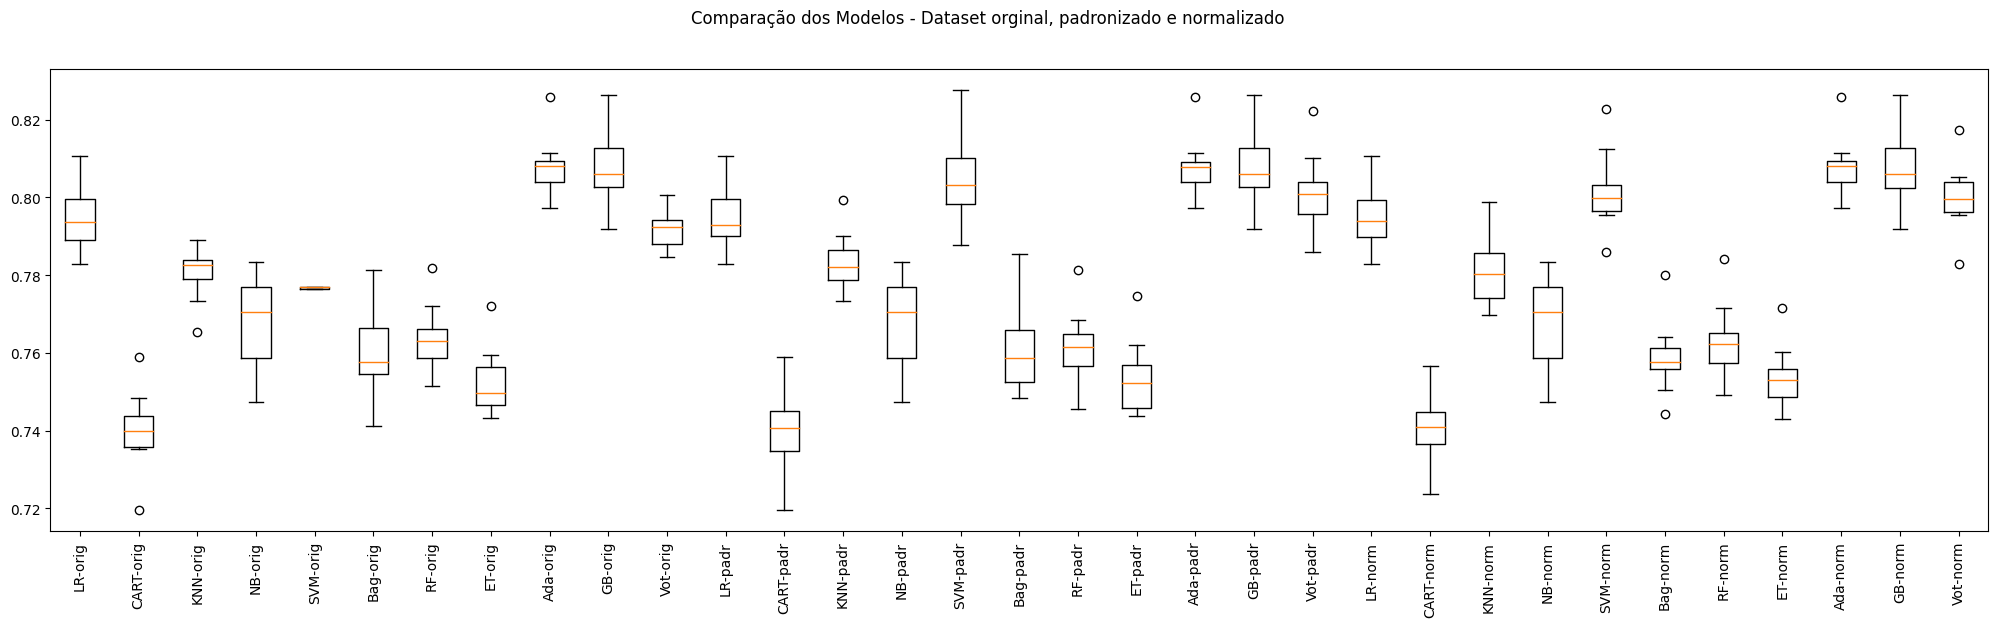

In [ ]:
# Métodos de Transformação dos Dados

from sklearn.preprocessing import MinMaxScaler #para normalização dos dados
from sklearn.preprocessing import StandardScaler #para padronização dos dados

# Definindo uma seed (semente) global para esta célula de código
np.random.seed(7)

# Listas para armazenar os armazenar os pipelines, os resultados e os nomes para todas as visões do dataset
pipelines = []
results = []
names = []


# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=2000))
cart = ('CART', DecisionTreeClassifier())
knn = ('KNN', KNeighborsClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
min_max_scaler = ('MinMaxScaler', MinMaxScaler())   # Normalização
standard_scaler = ('StandardScaler', StandardScaler())   # Padronização

# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()


De maneira geral, tanto a padronização quanto a normalização não alteram muito a acurácia dos modelos. Nos modelos KNN e Volting, a acurácia aumentou cerca de 1%. No modelo SVM, o aumento foi maior, em torno de 3%, e sua acurácia passou para 80,5% após a padronização do dataset.

Entre os dois métodos, no objetivo de melhorar a acurácia dos modelos, a padronização foi mais efetiva que a normalização.

Ainda assim, aparentemente, existe espaço para perseguir na melhoria dos modelos preditores.

A segunda etapa é a de dedicar atenção ao processo de seleção de atributos, conhecido como **feature selection**. Será visto a seguir.


## **7. Aprimoramento da Modelagem (*Feature Selection*)**

O feature selection é um processo importante porque atributos irrelevantes ou parcialmente relevantes podem afetar negativamente o resultado do modelo. Na verdade, ele antecede a etapa de modelagem. Porém, nesse trabalho, ele está sendo pontuado agora porque é salutar fazer a comparação do resultado antes e depois de sua aplicação.

Para isso, no nosso código, será utilizada a função SelectBest(), que é um método de seleção univariada de atributos. Nesse tipo de técnica, testes estatíticos são usados para selecionar os atributos que tenham relação mais forte com a variável de saída.

Foi testada a redução do dataset de oito para 4, 5 e 6 atributos, e a redução para 6 foi a que mais contribuiu para aumentar a acurácia em relação aos resultados originais.  

Sendo assim, faremos diretamente a redução de 8 para 6 atributos.

In [ ]:
# Imports necessários para esta etapa

from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada

# Feature Selection - Método da Seleção Univariada

# SelectKBest

# Seleção de atributos com SelectKBest. Redução da quantidade de atributos de 8 para 6 (k) atributos
best_var = SelectKBest(score_func=f_classif, k=6)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:8])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset.columns[0:8]))


Número original de atributos: 8

Número reduzido de atributos: 6

Atributos Originais: Index(['woman', 'age', 'education', 'work', 'metropolitan_area', 'non_white',
       'urban', 'work_permit'],
      dtype='object')

Scores dos Atributos Originais: [ 120.807   19.5   2419.041  490.134  262.969  747.235 1353.555  144.622]

Atributos Selecionados: ['education' 'work' 'metropolitan_area' 'non_white' 'urban' 'work_permit']




Por este método, os atributos "woman" e "age" se mostraram os dois menos relevantes para o modelo e, por isso, serão removidos.



In [ ]:
# Exibição do novo dataset, modificado após a retirada dos atributos "woman" e "age"

X[best_var.get_feature_names_out(input_features=dataset.columns[0:8])]

,education,work,metropolitan_area,non_white,urban,work_permit
15234,6,1,0,0.0,1,2
11601,5,6,0,0.0,1,2
8282,7,4,0,0.0,1,2
16241,7,8,0,0.0,1,2
3804,5,11,1,1.0,1,1
...,...,...,...,...,...,...
919,5,3,1,1.0,1,2
20692,2,5,1,0.0,1,1
5699,7,9,0,1.0,1,2
10743,5,6,1,1.0,1,1


In [ ]:
# Guarda o novo conjunto de dados após feature selection na variável x_selected

X_selected = X[best_var.get_feature_names_out(input_features=dataset.columns[0:8])]



Com o novo conjunto de dados, novas rodadas serão feitas com o objetivo de comparar os resultados anteriores com os resultados após a redução dos atributos "woman" e "age" do dataset original.



LR-orig: 0.795 (0.008)
LR-orig_sf: 0.792 (0.006)
CART-orig: 0.740 (0.010)
CART-orig_sf: 0.793 (0.009)
KNN-orig: 0.780 (0.006)
KNN-orig_sf: 0.770 (0.012)
NB-orig: 0.768 (0.011)
NB-orig_sf: 0.771 (0.009)
SVM-orig: 0.777 (0.000)
SVM-orig_sf: 0.789 (0.006)
Bag-orig: 0.760 (0.011)
Bag-orig_sf: 0.794 (0.009)
RF-orig: 0.764 (0.010)
RF-orig_sf: 0.794 (0.010)
ET-orig: 0.753 (0.008)
ET-orig_sf: 0.793 (0.009)
Ada-orig: 0.808 (0.007)
Ada-orig_sf: 0.804 (0.010)
GB-orig: 0.808 (0.009)
GB-orig_sf: 0.805 (0.011)
Vot-orig: 0.792 (0.005)
Vot-orig_sf: 0.794 (0.006)
LR-padr: 0.795 (0.008)
LR-padr_sf: 0.792 (0.007)
CART-padr: 0.740 (0.009)
CART-padr_sf: 0.793 (0.010)
KNN-padr: 0.783 (0.007)
KNN-padr_sf: 0.775 (0.012)
NB-padr: 0.768 (0.011)
NB-padr_sf: 0.771 (0.009)
SVM-padr: 0.805 (0.010)
SVM-padr_sf: 0.803 (0.009)
Bag-padr: 0.759 (0.009)
Bag-padr_sf: 0.794 (0.010)
RF-padr: 0.762 (0.010)
RF-padr_sf: 0.794 (0.009)
ET-padr: 0.753 (0.009)
ET-padr_sf: 0.793 (0.009)
Ada-padr: 0.808 (0.007)
Ada-padr_sf: 0.804 (0

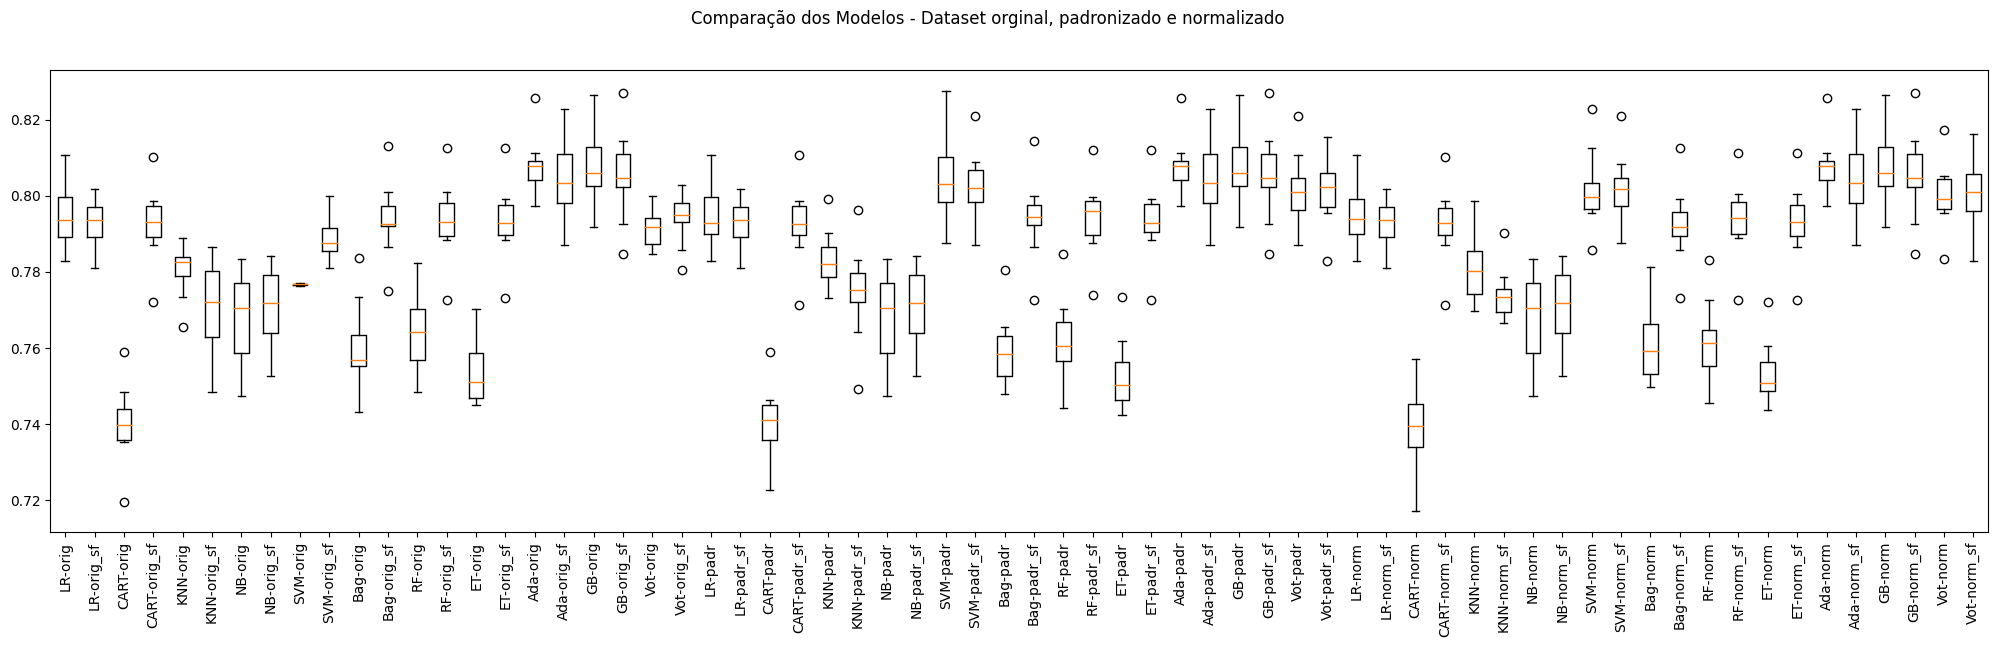

In [ ]:
selected_features = best_var.get_feature_names_out(input_features=dataset.columns[0:8])

# Definindo uma seed (semente) global para esta célula de código
np.random.seed(7)

# Listas para armazenar os armazenar os pipelines, os resultados e os nomes para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=2000))
cart = ('CART', DecisionTreeClassifier())
knn = ('KNN', KNeighborsClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
min_max_scaler = ('MinMaxScaler', MinMaxScaler())
standard_scaler = ('StandardScaler', StandardScaler())

# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

    name = name + '_sf'

    cv_results = cross_val_score(model, X_train[selected_features], y_train, cv=skf, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Agora, são 66 valores apresentados em lista, informando a acurácia de cada modelo (média e desvio padrão). São os mesmos 33 apresentados anteriormente, mas, agora, cada um está acompanhado de seu "par" após feature seletion.

No gráfico boxplot, os resultados de cada modelo está plotado com seus pares lado a lado, facilitando a visualização. Por exemplo, as duas primeiras séries do gráfico são do modelo de Regressão Logística sem a feature selection (LR-orig) e o modelo de Regressão Logística com a feature selection (LR-orig_sf). E, assim, segue.

Analisando cada par individualmente, nota-se que o feature selection aumentou a acurácia dos modelos que não estavam bem "ranqueados". Alguns deles como Árvore de Decisão (CART), SVM, Bagging, Random Forest e Extra Trees, a acurácia aumentou de 3 a 5%. O pior modelo tem uma acurácia acima de 76%, quando antes da feature selection esse valor era um pouco maior que 73%.

Dos 33 pares, apenas em 12 houve piora, ainda que muito pequena: Regressão Logística (LR), KNN, AdaBoost (Ada), Gradiente Boosting (GB) e as respectivas variantes (padronizadas e normalizadas). Justo nos modelos que apresentavam os melhores resultados.

De forma geral, os resultados sugerem que o valor da acurácia tem uma assíntota em torno de 80%.

Aumentar a acurácia não é a única vantagem do feature selection. Como outras vantagens, podemos citar (KALINOWSKI et al, 2023):

- Redução do overfitting, pois dados menos redundantes diminuem o risco de decisões com base em ruído;

- Redução do tempo de treinamento, pois trabalhar com menos dados acelera o treinamento;

- Melhoria da interpretabilidade do modelo.

As duas primeiras etapas vistas até aqui são técnicas de melhoria dos modelos preditores que atuam no conjunto de dados. Conforme foi visto, através delas, alguns modelos aumentaram sua acurácia em quase 5%.

Pelos resultados obtidos, vamos considerá-las como cumulativas, isto é, nessa perseguição pelo melhor modelo, vamos padronizar o conjunto de dados e aplicar o feature selection.

Contudo, dentro dos recursos avançados de Machine Learning, ainda podemos atuar na configuração dos modelos ("por dentro" deles), alterando os valores de alguns de seus hiperparâmetros. A **otimização de hiperparâmetros** é a terceira etapa de nosso processo de aperfeiçoamento.

## **8. Aprimoramento da Modelagem (Otimização de Hiperparâmetros)**


Nessa terceira etapa, vamos ajustar melhor alguns algoritmos, modificando a configuração padrão (default) partindo do dataset padronizado e após aplicação do feature selection.

Vamos otimizar os hiperparâmetros do modelo KNN, que ainda está com acurácia abaixo de outros modelos (77,4%); do modelo CART, cuja sua acurácia reagiu bem à feature selection (saiu de 73,3% para 78,7%) e, portanto, teria potencial para melhorar mais um pouco; e dos modelos que desde o início estão como os melhores preditores (AdaBoost e Gradient Boosting, ambos com 80,1%).

No nosso código, a biblioteca utilzada para fazer a otimização de hiperparâmetros desses quatro modelos foi GridSearchCV(), que nos permite informar em um grid quais hiperparâmetros queremos variar, bem como o conjunto de valores que queremos avaliar para cada um deles.

De acordo com Kalinowski et al (2023), para cada combinação de hiperparâmetros especificada no grid, a biblioteca vai sistematicamente construir e avaliar um modelo utilizando validação cruzada, o que nos permitirá escolher ao final desse processo a melhor combinação de hiperparâmetros para o algoritmo em questão.

Valores dos Hiperparâmetros de cada algoritmo que foram avaliados:

- KNN:
  n_neighbors (vizinhos): 1,3,5,7,9,11,13,15,17,19,21;
  metric (distância): euclidean, manhattan, minkowski.

- CART:
  max_depth: 2,3,5,7,9,13,15,17,19;
  min_samples_split: 8,16,32,64,128,256,512;
  min_samples_leaf: 8,16,32,64,128,256,512.

- AdaBoost:
  n_estimators: 30,50,100,200;
  learning_rate: 1.0,0.10
  
- Gradient Boosting:
  n_estimators: 30,50,100,200;
  learning_rate: 1.0,0.10

Importante lembrar que essas rodadas estão sendo feitas após o feature selection.


In [ ]:
# Tuning do KNN (k-Nearest Neighbors)

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=skf)
    grid.fit(X_train[selected_features], y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.794680 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 21}
Sem tratamento de missings: knn-padr - Melhor: 0.795041 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 21}
Sem tratamento de missings: knn-norm - Melhor: 0.794681 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 21}


Para o KNN com padronização do dataset e feature selection, a combinação que trouxe a maior acurácia (79,5%) foi a de distância euclidiana com 21 vizinhos. É uma acurácia maior que aquela KNN-padr_sf com configuração padrão igual a 77,5%.

In [ ]:
# Tuning do CART (Árvore de Decisão)

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
cart = ('CART', DecisionTreeClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('cart-orig', Pipeline(steps=[cart])))
pipelines.append(('cart-padr', Pipeline(steps=[standard_scaler, cart])))
pipelines.append(('cart-norm', Pipeline(steps=[min_max_scaler, cart])))

param_grid = {
    'CART__max_depth': [2,3,5,7,9,13,15,17,19],
    'CART__min_samples_split': [8,16,32,64,128,256,512],
    'CART__min_samples_leaf': [8,16,32,64,128,256,512],
}
# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=skf)
    grid.fit(X_train[selected_features], y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: cart-orig - Melhor: 0.802820 usando {'CART__max_depth': 9, 'CART__min_samples_leaf': 32, 'CART__min_samples_split': 128}
Sem tratamento de missings: cart-padr - Melhor: 0.802820 usando {'CART__max_depth': 9, 'CART__min_samples_leaf': 32, 'CART__min_samples_split': 128}
Sem tratamento de missings: cart-norm - Melhor: 0.802820 usando {'CART__max_depth': 9, 'CART__min_samples_leaf': 32, 'CART__min_samples_split': 128}


Para o CART com padronização do dataset e feature selection, a combinação que trouxe a maior acurácia (80,3%) foi a de max_depth igual a 9, min_sample_leaf igual a 32 e min_samples_split igual a 128. É uma acurácia maior que aquela do CART-padr_sf (com configuração default) igual a 79,3%.

In [ ]:
# Tuning do AdaBoost

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
ada = ('Ada', AdaBoostClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('Ada-orig', Pipeline(steps=[ada])))
pipelines.append(('Ada-padr', Pipeline(steps=[standard_scaler, ada])))
pipelines.append(('Ada-norm', Pipeline(steps=[min_max_scaler, ada])))

param_grid = {
    'Ada__n_estimators': [30,50,100,200],
    'Ada__learning_rate': [1.0,0.10]
}
# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=skf)
    grid.fit(X_train[selected_features], y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: Ada-orig - Melhor: 0.804508 usando {'Ada__learning_rate': 1.0, 'Ada__n_estimators': 200}
Sem tratamento de missings: Ada-padr - Melhor: 0.804508 usando {'Ada__learning_rate': 1.0, 'Ada__n_estimators': 200}
Sem tratamento de missings: Ada-norm - Melhor: 0.804508 usando {'Ada__learning_rate': 1.0, 'Ada__n_estimators': 200}


Para o AdaBoost com padronização do dataset e feature selection, a combinação que trouxe a maior acurácia (80,4%) foi a de learning rate igual a 1.0 e n_estimators igual a 200. É uma acurácia igual àquela obtida no Ada-padr_sf com configuração padrão igual a 80,4%.

In [ ]:
# Tuning do Gradient Boosting

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
gb = ('GB', GradientBoostingClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('GB-orig', Pipeline(steps=[gb])))
pipelines.append(('GB-padr', Pipeline(steps=[standard_scaler, gb])))
pipelines.append(('GB-norm', Pipeline(steps=[min_max_scaler, gb])))

param_grid = {
    'GB__n_estimators': [30,50,100,200],
    'GB__learning_rate': [1.0,0.10]
  }
# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=skf)
    grid.fit(X_train[selected_features], y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: GB-orig - Melhor: 0.805353 usando {'GB__learning_rate': 0.1, 'GB__n_estimators': 100}
Sem tratamento de missings: GB-padr - Melhor: 0.805353 usando {'GB__learning_rate': 0.1, 'GB__n_estimators': 100}
Sem tratamento de missings: GB-norm - Melhor: 0.805353 usando {'GB__learning_rate': 0.1, 'GB__n_estimators': 100}


Para o Gradient Boosting com padronização do dataset e feature selection, a combinação que trouxe a maior acurácia (80,5%) foi a de learning rate igual a 0.10 e n_estimators igual a 100. É uma acurácia igual àquela obtida no Gradient Boosting_sf com configuração padrão.

Portanto, terminada a fase de treino, após consecutivas depurações no banco de dados e na configuração dos hiperparâmetos, o algoritmo que apresentou a melhor acurácia foi o **Gradient Boosting** com seu hiperparâmeto n_estimators igual a 200. Esse modelo foi aplicado após seleção dos atributos e a devida padronização desse dataset.

A acurácia foi de **80,5%**.

Agora, precisamos verificar se esse desempenho se mantém no conjunto teste.

## **9. Finalização do Modelo**

Para a finalização do modelo escolhido, vamos treiná-lo em todo o conjunto de dados de treinamento (padronizados e tendo sido aplicada a feature selection) e faremos a predição para o conjunto de dados de teste que foi separado no início do trabalho, com o objetivo de confirmar os resultados.



In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo

scaler = StandardScaler().fit(X_train[selected_features]) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train[selected_features]) # aplicação da padronização no conjunto de treino já com feature selection
#model = GradientBoostingClassifier(n_estimators=num_trees)
model = GradientBoostingClassifier(n_estimators=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste

rescaledTestX = scaler.transform(X_test[selected_features]) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.7894356005788712


A acurácia média do conjunto de teste foi **78,9%** um pouco menor (mas bem próxima) à acurácia média do conjunto de treino, que foi de **80,5%**.

Valores semelhantes indicam um modelo bem ajustado, sem a ocorrência nem de underfitting nem de overfitting. Segundo Kalinowski et al (2023), valores semelhantes à acurácia de teste são esperados quando esse modelo estiver executando em produção e fazendo predições para novos dados.

Agora, vamos preparar o modelo para utilização em produção. Para isso, vamos treiná-lo com todo o dataset, e não apenas o conjunto de treino.



In [ ]:
# Preparação do modelo com TODO o dataset

scaler = StandardScaler().fit(X[selected_features]) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X[selected_features]) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

GradientBoostingClassifier(n_estimators=200)

## **10. Simulação do modelo com dados não vistos**

Escolhido o modelo e calculada a sua acurácia, precisamos simular a sua aplicação em dados não vistos. É neste momento que utilizaremos o conjunto de validação (X_val e y_val). Cabe lembrar que esse coojunto foi destacado do dataset no início deste trabalho, antes da separação treino-teste, justamete para que ele não seja conhecido da modelagem.

Outrossim, poderíamos ter construído esse conjunto de forma fictícia. Esse expediente seria válido para obtenção de algum resultado. Contudo, não seria possível comparar esse resultado da predição com o valor observado.

O conjunto de validação tem seus atributos (X) e sua classe target (y) conhecida. Os atributos serão submetidos ao modelo escolhido (Gradient Boosting) para a predição da classe target: está fora da faixa de pobreza (0) ou dentro (1).

In [ ]:
# Novos dados - não sabemos a classe!

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_val[selected_features])
print(rescaledEntradaX)

[[ 1.304  0.837  1.304 -1.096  0.521  0.983]
 [ 0.247  1.782 -0.767  0.913  0.521 -1.692]
 [-1.339 -1.053  1.304  0.913  0.521  0.983]
 [-1.339 -1.053 -0.767  0.913  0.521 -0.354]
 [ 1.304  0.207  1.304  0.913  0.521  0.983]
 [ 0.247  1.152 -0.767 -1.096  0.521 -1.692]
 [ 0.247  0.207  1.304  0.913  0.521  0.983]
 [ 0.247 -0.108 -0.767 -1.096  0.521 -0.354]
 [-1.339 -1.368 -0.767  0.913 -1.92  -0.354]
 [ 0.247 -1.053 -0.767 -1.096  0.521 -0.354]
 [ 1.304 -1.053  1.304 -1.096  0.521 -0.354]
 [-0.81  -0.423 -0.767 -1.096  0.521 -0.354]
 [ 0.247 -1.053  1.304 -1.096  0.521 -0.354]
 [ 1.304  1.152 -0.767  0.913 -1.92  -1.692]
 [ 0.247  1.467  1.304 -1.096  0.521  0.983]
 [-0.282 -1.053 -0.767  0.913 -1.92  -1.692]
 [ 1.304 -0.423 -0.767 -1.096  0.521  0.983]
 [-1.339 -1.368 -0.767 -1.096 -1.92   0.983]
 [-1.339 -1.053 -0.767  0.913 -1.92  -0.354]
 [ 0.247 -0.423 -0.767  0.913  0.521 -1.692]
 [ 0.247 -1.053  1.304  0.913  0.521 -0.354]]


In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


In [25]:
# Comparação entre o valor predito e o valor observado

y_val

11119    0
3262     1
1111     1
13933    0
1113     1
12716    1
10190    0
20176    0
18490    0
16461    0
14394    0
13453    0
11436    0
735      1
10508    1
4308     1
8113     0
15596    0
9817     0
4552     0
6177     0
Name: poverty, dtype: int64

Comparando predição x observação, houve 5 discordâncias em 21, um percentual de 76,2%. É um valor bem próximo à acurácia calculada de 78,9%.

## **11. Conclusão**

Ao longo desse trabalho, procurou-se apresentar as técnicas de Machine Learning aplicadas a um problema de classificação. Foram realizadas as etapas de preparação e pré-processamento do banco de dados, separação treino-teste, seleção de atributos, modelagem, avaliação do modelo e simulação com dados desconhecidos.

Na modelagem, foram explorados os algoritmos simples e os ensembles, que são meta-algoritmos que combinam modelos, além de alguns deles terem sido testados via otimização de seus hiperparâmetros.

O modelo preditor escolhido apresentou acurácia igual a 78,9%, ou seja, a cada 10 predições, ele converge para 8 acertos.

Contudo, mesmo após utilizar um bom repertório das técnicas de Machine Learning disponíveis, aparentemente, a acurácia tende a atingir uma assíntota em torno de 80%. Como ponto de melhoria para esse trabalho, uma boa frente seria atuar no banco de dados, no sentido de aumentar o número de atributos relevantes. Talvez haja outros atributos que ajudem a explicar a pobreza (ou o perfil de renda dos indivíduos). Ex.: quantidade de pessoas que residem no mesmo domicílio ou, ainda, tempo em que o indivíduo está sem emprego formal.

## **12. Referência Bibliográfica**

KALINOWSKI, Marcos; ESCOVEDO, Tatiana; VILLAMIZAR, Hugo; LOPES, Hélio. Engenharia de Software para Ciêcia de Dados: um guia de boas práticas com ênfase na construção de sistemas de Machine Learning em Python. São Paulo: Aovs Sistemas de Informática, 2023.